# High Dynamic Range Tone Mapping

Grace Zhang

## Outline
1. Background
2. Problem
3. Methods

## Background: Luminance

Real world scenes have very high luminance variation

<br>

<center><img src="figs/luminance.jpeg" width=800px alt="default"/></center>
*plot shows log base 10 of actual luminance

## Background: Human Eye Perception

Dynamic Range: ratio between the maximum and minimum intensity/luminance values of a scene.

Human eye can perceive a dynamic range with a ratio of approximately 10,000 to 1 within a single view.

<br>

<center><img src="figs/eye.jpeg" width=500px alt="default"/></center>

## Background: Camera & Display Technology

Modern cameras are capable of capturing scenes in high dynamic range (HDR) to match the range that human eyes can perceive.

Despite advancements in HDR capture, commercial displays are still usually in low dynamic range (LDR).

<br>

<center><img src="figs/camera_ex.jpeg" width=500px alt="default"/></center>

## Problem: Reproducing HDR Images on LDR Displays

When an HDR image is displayed on an LDR screen, details in the brightest and darkest parts of the image are often lost

This image tend to appear washed out, over- or underexposed while also losing important details 

<br>

<center><img src="figs/exposure.jpeg" width=700px alt="default"/></center>

In [33]:
%matplotlib notebook
import tone_mapping_methods as tm
import helpers
import warnings
warnings.filterwarnings('ignore')

image_path = './dataset/*.hdr'

images = helpers.read_images(image_path)

<IPython.core.display.Javascript object>


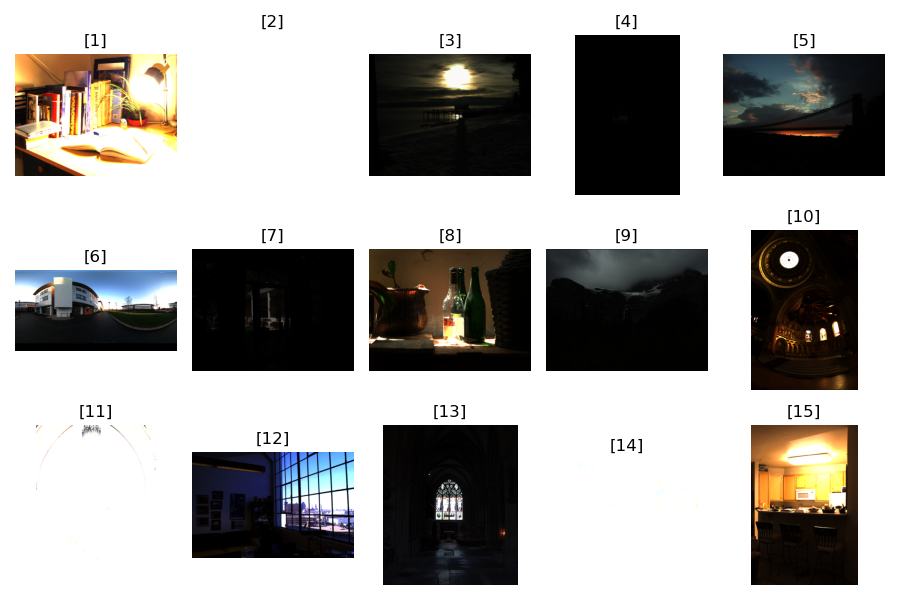

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

In [34]:
helpers.display_images(images, 3, 5, 'Input Images Linearly Scaled')

## Methods

1. Adaptive Dynamic Range Adjustment [1]

2. Enhanced Local Tone Mapping [2]

## Adaptive Dynamic Range Adjustment

1. Obtain luminance component from image in YCbCr
2. Transform luminance to logarithmic domain
3. Split luminance into dark and bright regions
4. Find optimal gamma values that minimize the differences between the medians and standard deviations of pixels for both dark and bright regions
5. Sharpen the gamma corrected dark and bright regions
6. Apply fusion on the sharpened dark and bright regions
7. Restore colors by auto-adjusting saturation based on the gamma corrected bright pixels

<IPython.core.display.Javascript object>


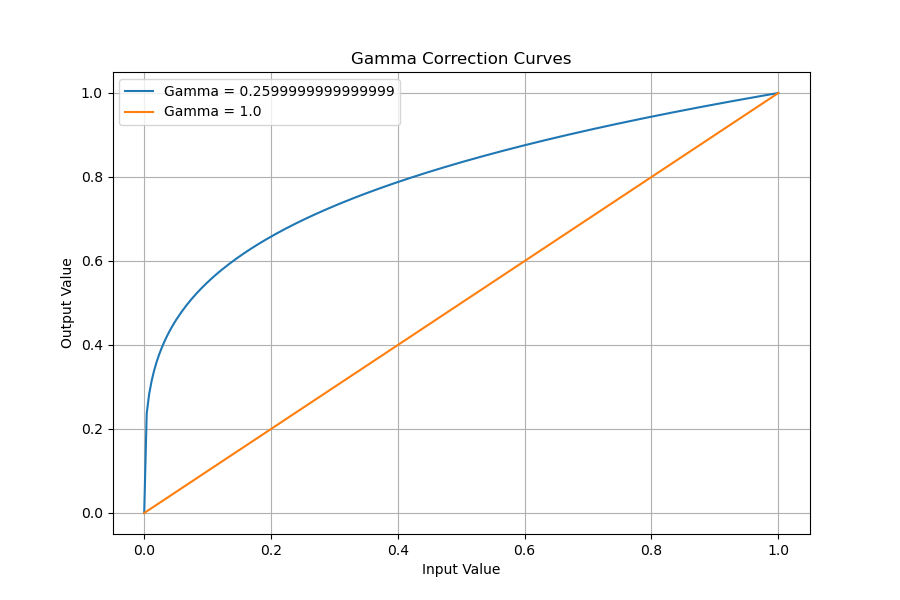

In [32]:
# Showing an example of gamma curves 
out_img1 = tm.adaptive_dynamic_range_adjustment(images[14], display_gamma=True)

<IPython.core.display.Javascript object>


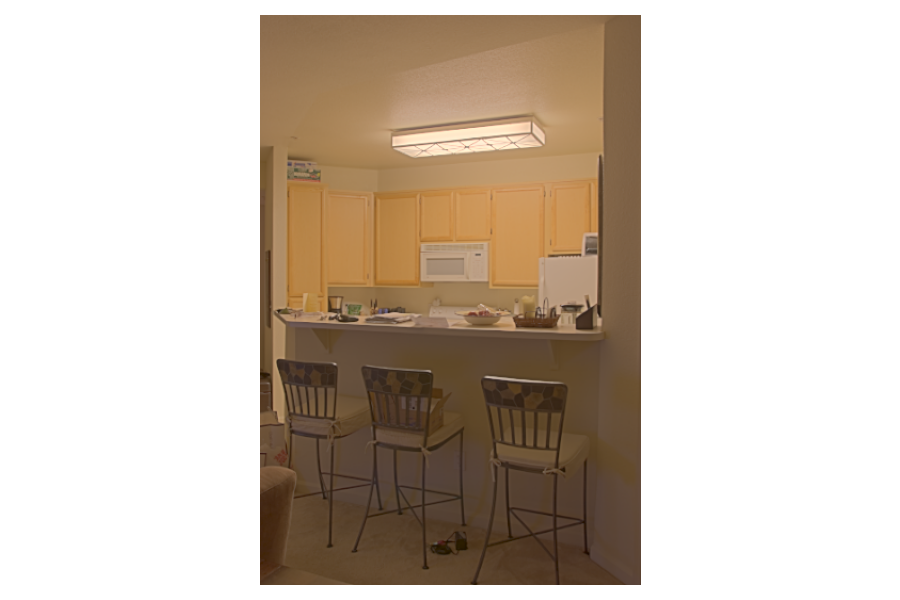

In [35]:
# Showing an example of the output from applying the adaptive method
helpers.display_single_image(out_img1, 'Adaptive Method Example Output')

In [5]:
# Run adaptive method on all images
adaptive_processed_list = tm.adaptive_dynamic_range_adjustment_multi(images)

<IPython.core.display.Javascript object>


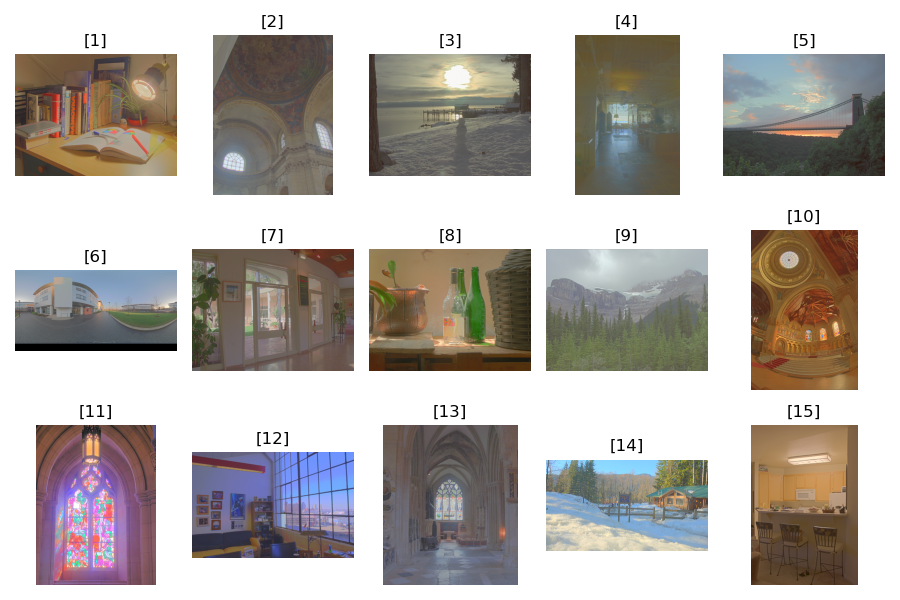

In [37]:
# Show all output images from applying the adaptive method
helpers.display_images(adaptive_processed_list, 3, 5, 'Adaptive Dynamic Range Adjustment')

<IPython.core.display.Javascript object>


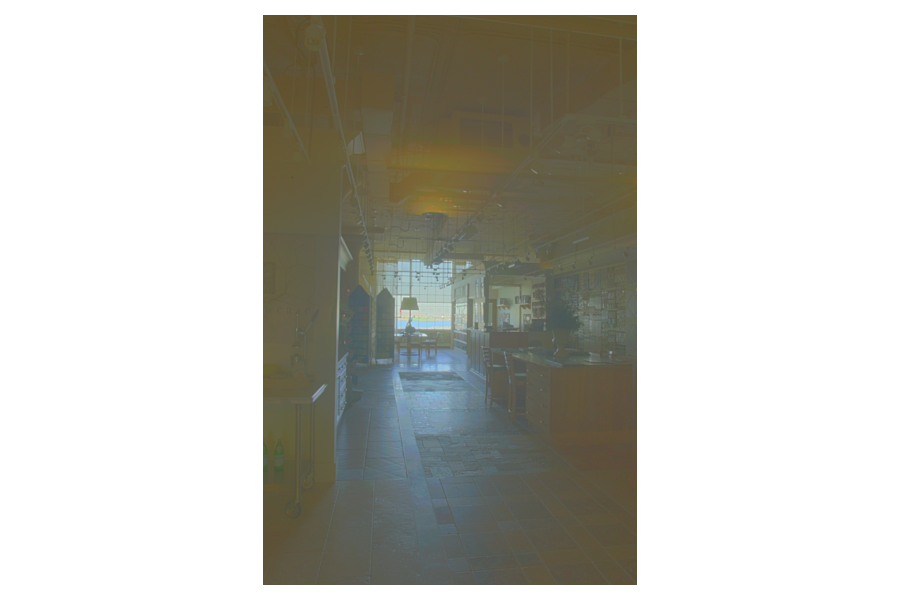

In [36]:
# Showing an example of a case that adaptive method doesn't work well
helpers.display_single_image(adaptive_processed_list[3], 'Adaptive Method Bad Output')

## Enhanced Local Tone Mapping

1. Obtain relative luminance component from image
2. Transform luminance to logarithmic domain
3. Decompose image to base plane, and fine and coarse detail planes
4. Perform preprocessing contrast reduction to utilize the whole dynamic range by shifting and scaling the base plane
5. Generate detail enhancement plane by applying spatially varying gain map created from base plane onto the fine and coarse details
6. Apply logarithmic tone compression on base plane
7. Multiply the compressed base plane and detail plane to get the compressed luminance
8. Restore colors from the compressed luminance

<IPython.core.display.Javascript object>


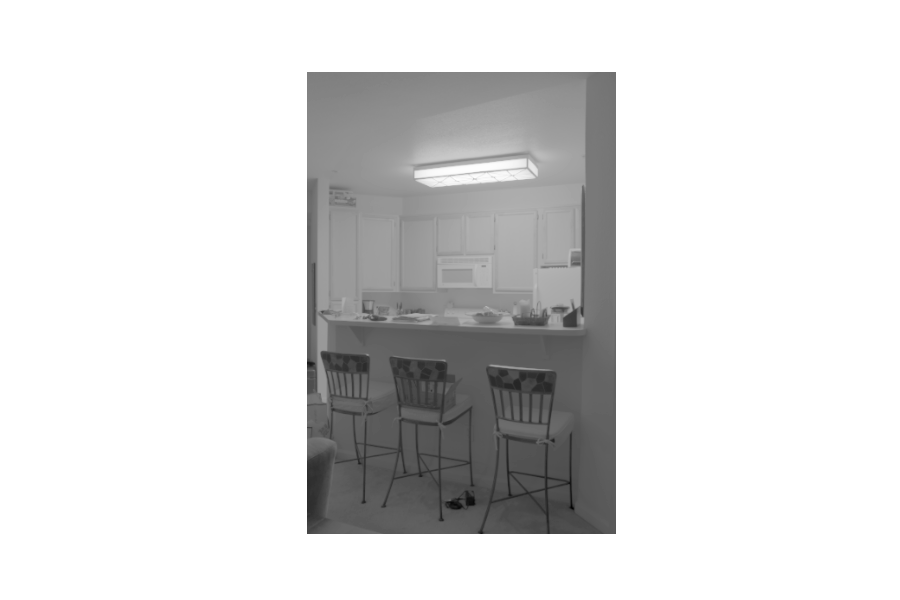

In [38]:
img = images[14]
# Step 1: Obtain relative luminance component from image
# Step 2: Transform luminance to logarithmic domain
luminance, log_luminance = tm.log_luminance(img, display=True)

<IPython.core.display.Javascript object>


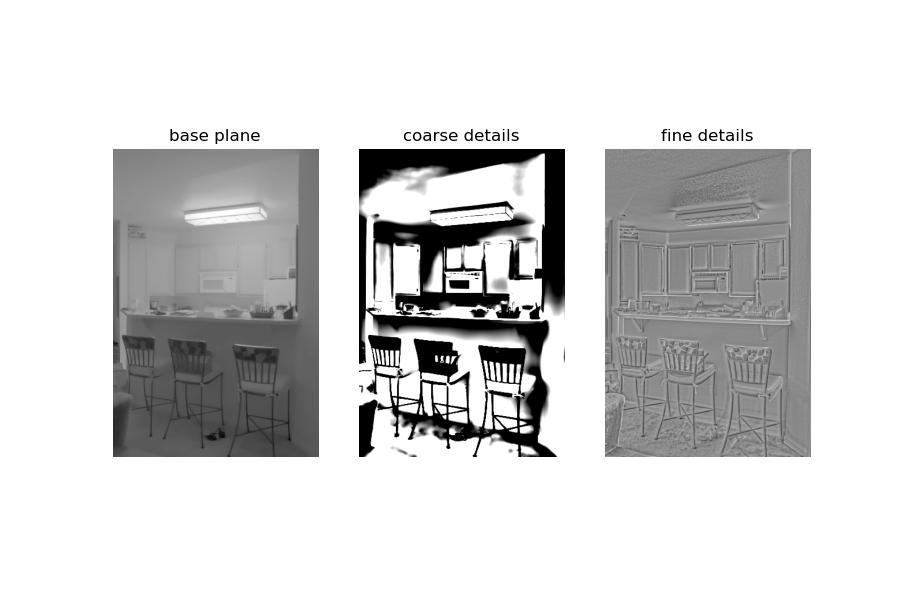

In [39]:
# Step 3: Decompose image to base plane, and fine and coarse detail planes
base, detail_coarse, detail_fine = tm.decomposition(log_luminance, display=True)

<IPython.core.display.Javascript object>


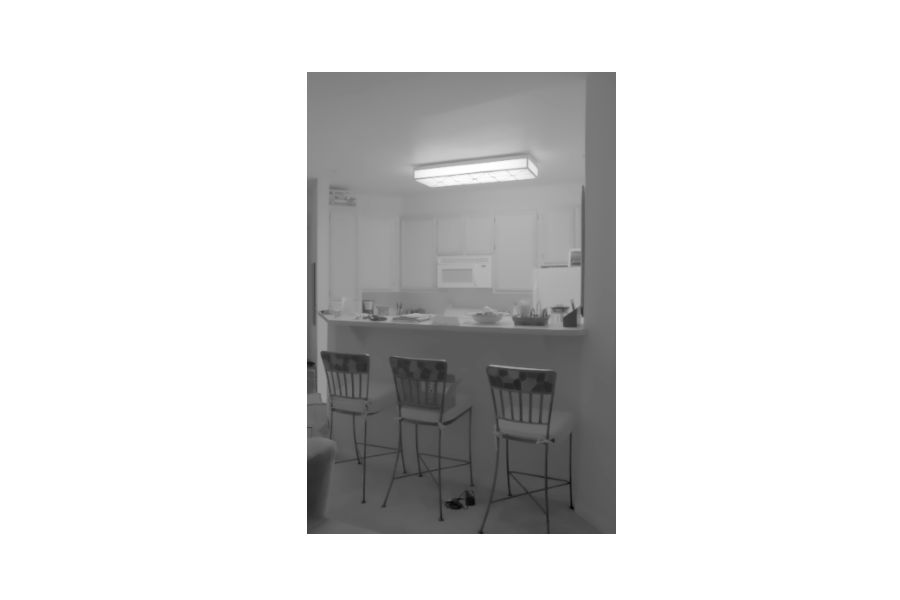

In [40]:
# Step 4: Perform preprocessing contrast reduction to utilize the 
# whole dynamic range by shifting and scaling the base plane
base_adjusted, min_base_log, max_base_log = tm.contrast_reduction(base, display=True)

<IPython.core.display.Javascript object>


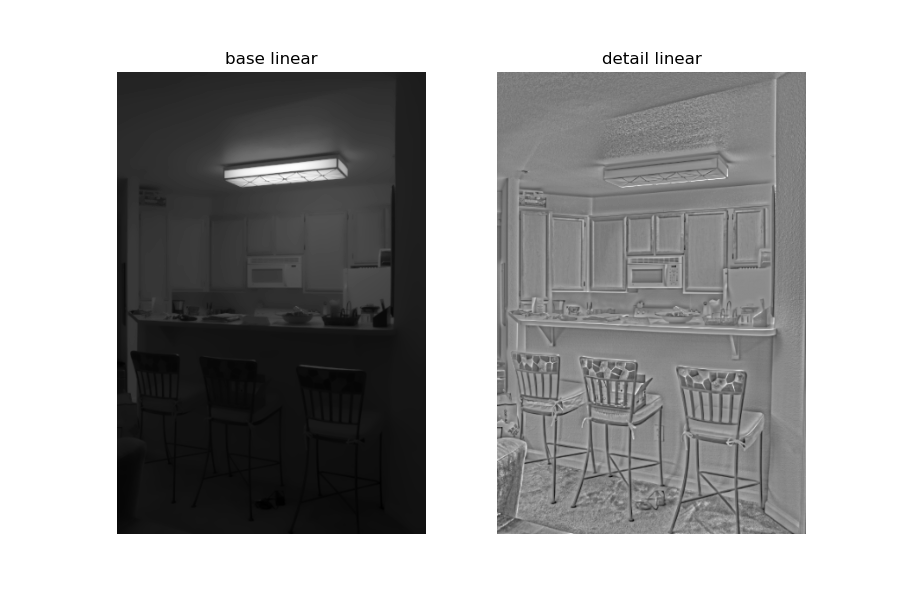

In [41]:
# Step 5: Generate detail enhancement plane by applying 
# spatially varying gain map created from base plane onto the fine and coarse details
base_linear, detail_linear = tm.detail_enhancement(base_adjusted, detail_coarse, detail_fine, display=True)

<IPython.core.display.Javascript object>


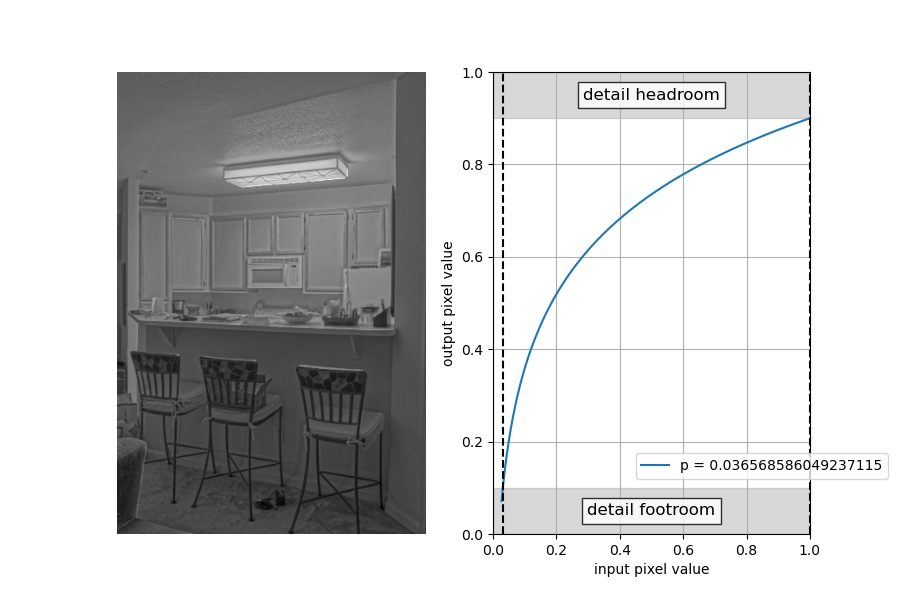

In [42]:
# Step 6: Apply logarithmic tone compression on base plane
base_compressed, luminance_adjusted = tm.tone_compression(base_adjusted, base_linear, detail_linear, min_base_log, max_base_log, display=True)

<IPython.core.display.Javascript object>


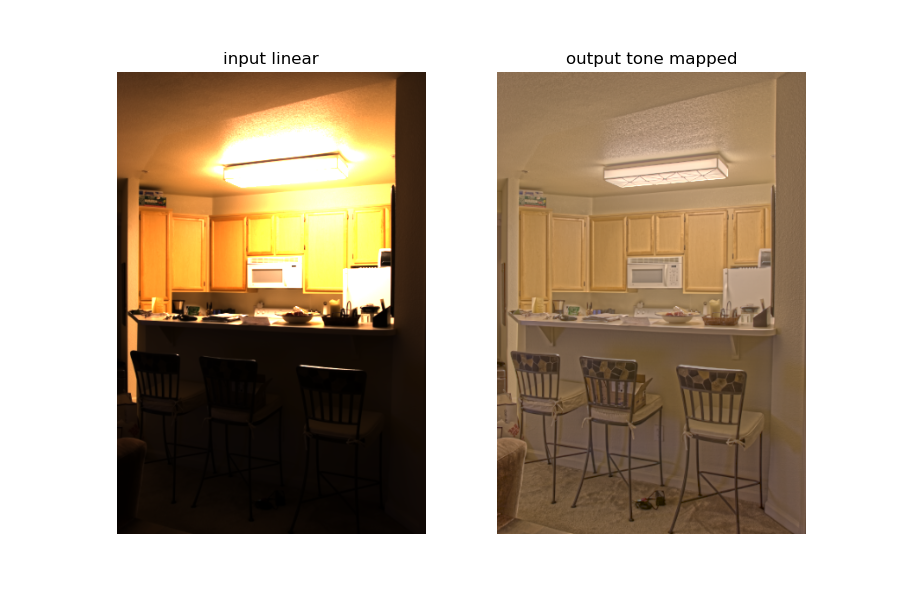

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [43]:
# Step 7: Multiply the compressed base plane and detail plane to get the compressed luminance
# Step 8: Restore colors from the compressed luminance
out_img2 = tm.color_restoration(img, luminance, luminance_adjusted, display=True)

<IPython.core.display.Javascript object>


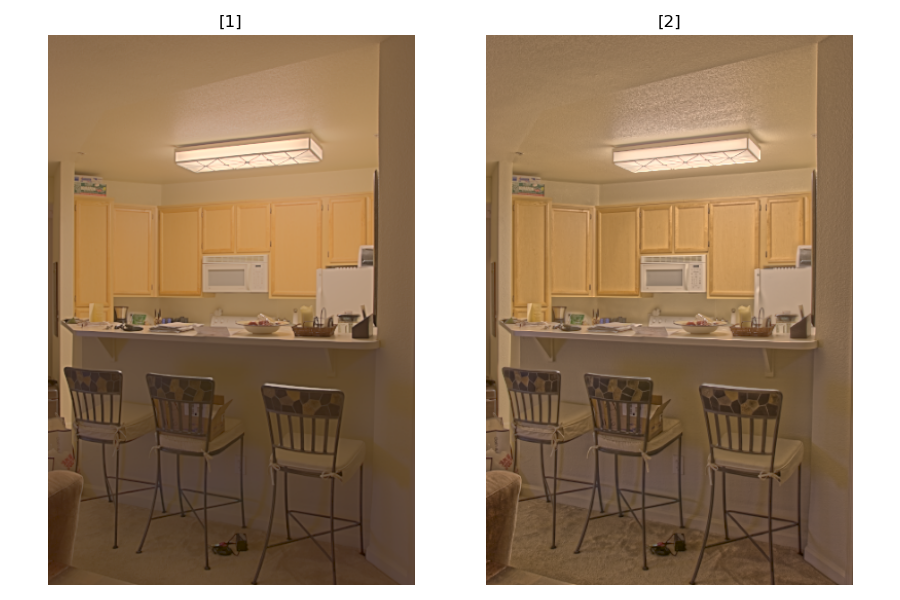

In [44]:
# Comparing against the two methods
# Left: Adaptive dynamic range adjustment
# Right: Enhanced local tone mapping
side_by_side = [out_img1, out_img2]

helpers.display_images_link(side_by_side, 1, 2, 'Side-by-Side Comparison')

In [15]:
# Run enhanced local tone mapping method on all images
enhanced_local_processed_list = tm.enhanced_local_tone_mapping_multi(images)

<IPython.core.display.Javascript object>


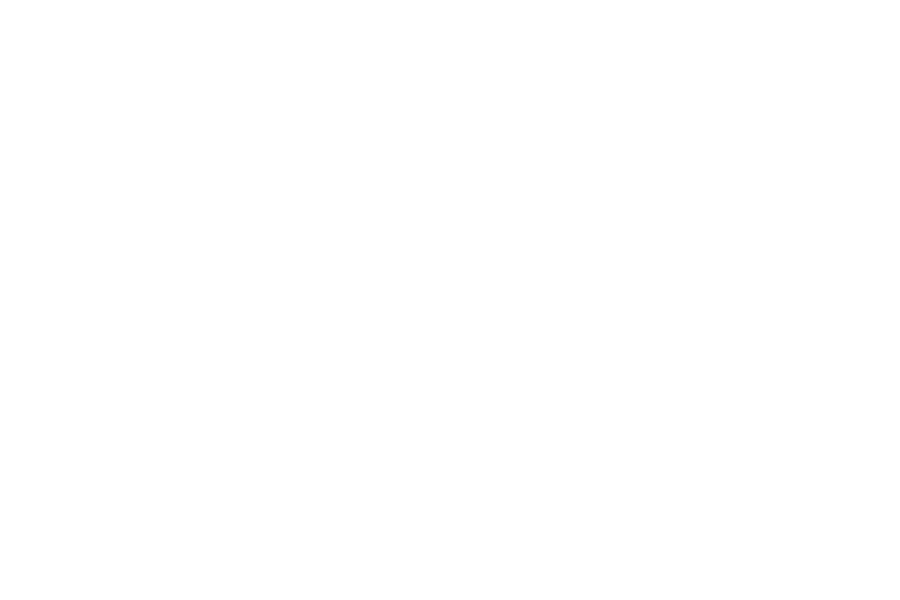

In [30]:
# Show all output images from applying the enhanced local tone mapping method
helpers.display_images(enhanced_local_processed_list, 3, 5, 'Enhanced Local Tone Mapping')

<IPython.core.display.Javascript object>


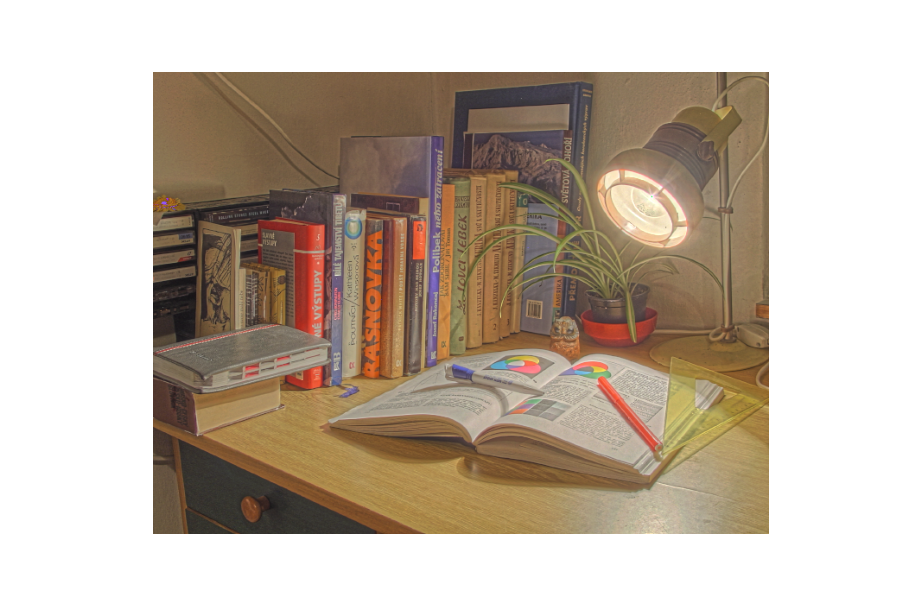

interactive(children=(Dropdown(description='Select Image:', layout=Layout(width='75%'), options=(('desk', 0), …

In [45]:
# Interactive tuning of the enhanced local tone mapping method
helpers.enhanced_local_tone_mapping_live_tuning(images)

## References

[1] R. Mantiuk, A. Tomaszewska, and R. Mantiuk, "Comparison of four subjective methods for image quality assessment," IEEE Transactions on Image Processing, vol. 22, no. 1, pp. 57-68, Jan. 2013. Available: https://ieeexplore.ieee.org/document/8303203.

[2] M. F. Cohen, S. K. Nayar, and K. A. Pattanaik, "A Comprehensive Review of Computational Approaches and Challenges in High Dynamic Range Imaging," Journal of Visual Communication and Image Representation, vol. 53, pp. 30-48, May 2018. Available: https://www.sciencedirect.com/science/article/pii/S1047320318300555.

[3] F. Durand and J. Dorsey, "Fast Bilateral Filtering for the Display of High-Dynamic-Range Images," ACM SIGGRAPH, pp. 257-266, 2002. Available: https://people.csail.mit.edu/fredo/PUBLI/Siggraph2002/.

[4] Z. Wang and A. C. Bovik, "HDR Image Tone Mapping Using the TMQI Metric," University of Waterloo, 2012. Available: https://ece.uwaterloo.ca/~z70wang/research/tmqi/.

[5] M. V. A. Albu and R. K. Ward, "HDR Gallery: A Public Resource for HDR Imaging," 2010. Available: https://pfstools.sourceforge.net/hdr_gallery.html.